# Data

https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15/data

# Index

1. Data Inspection
2. Data Preprocessing for EDA
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing for Modelling
5. Modelling

# 1. Data Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
NB15_features = pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv', encoding='cp1252')
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [3]:
df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

In [4]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [5]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [8]:
df.describe(include='object')

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


# 2. Data Preprocessing for EDA

In [9]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum().sum()

0

In [12]:
df.drop(['id'], axis=1, inplace=True)

In [13]:
# Replacing '-' in state and service for 'other'
df['state'] = df['state'].replace('-','other')
df['service'] = df['service'].replace('-','other')

# 3. EDA

In [14]:
counts = df['label'].value_counts()
fig = px.pie(counts, values=counts.values, names=counts.index, title='Distribution of Label')
fig.show()

Grouping by attack category

In [15]:
df[df['attack_cat']!='normal'].groupby('attack_cat').size()

attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
dtype: int64

We need to group Backdoor and Backdoors into a single category

In [16]:
df['attack_cat'] = df['attack_cat'].apply(lambda item: 'Backdoor' if item =='Backdoors' else item)

In [17]:
attack_by_cat = df[df['attack_cat']!='normal'].groupby('attack_cat').size().reset_index(name='counts')
attack_by_cat

,attack_cat,counts
0,Analysis,677
1,Backdoor,583
2,DoS,4089
3,Exploits,11132
4,Fuzzers,6062
5,Generic,18871
6,Normal,37000
7,Reconnaissance,3496
8,Shellcode,378
9,Worms,44


Distribution of attacks by category

In [18]:
attack_by_cat = df[df['attack_cat']!='normal'].groupby('attack_cat').size().reset_index(name='counts').sort_values(by='counts', ascending = False)
fig = px.bar(attack_by_cat, x='attack_cat', y='counts', title='Distribution of attack categories')
fig.show()

Distribution of source bytes by attack category

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

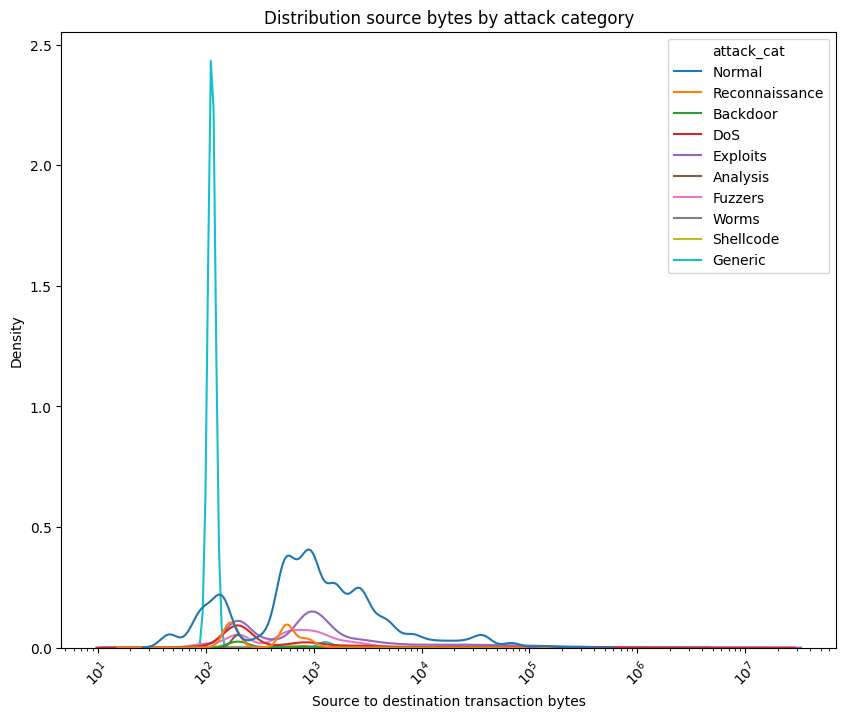

In [19]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(x='sbytes',hue='attack_cat',log_scale=True,data=df[df['attack_cat']!='normal'])
ax.set_title('Distribution source bytes by attack category')
ax.set_xlabel('Source to destination transaction bytes')
ax.set_ylabel('Density')
plt.xticks(rotation=45)
plt.show()

Most used services by attack category

In [20]:
df_attacks_cat_services = df[(df['attack_cat']!='normal')].groupby(['attack_cat','service']).size().reset_index(name='Count')

In [21]:
# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# Create a list of attack categories to loop through
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define row and column positions for each plot
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)]

# Loop through the categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['service'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update layout
fig.update_layout(height=900, width=900, title_text="Service Counts by Attack Categories", showlegend=False)

# Update x-axis for all subplots
fig.update_xaxes(tickangle=90)

# Show the figure
fig.show()


Top-5 protocols used by attack category

In [22]:
df_attacks_cat_proto = df[(df['attack_cat']!='normal')].groupby(['attack_cat','proto']).size().reset_index(name='Count')

In [23]:
# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# Create a list of attack categories to loop through
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define row and column positions for each plot
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)]

# Loop through the categories and create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top 5 protocols
    df_filtered = df_attacks_cat_proto[df_attacks_cat_proto['attack_cat'] == category][:5]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['proto'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update layout
fig.update_layout(height=900, width=900, title_text="Top 5 Protocols by Attack Categories", showlegend=False)

# Update x-axis for all subplots
fig.update_xaxes(tickangle=90)

# Show the figure
fig.show()


Distribution of states by attack category

In [24]:
df_attacks_cat_state = df[(df['attack_cat']!='normal')].groupby(['attack_cat','state']).size().reset_index(name='Count')

In [25]:
# Create a 3x3 subplot grid
fig = make_subplots(rows=3, cols=3,
                    subplot_titles=('Category: Analysis', 'Category: Backdoor', 'Category: DoS',
                                    'Category: Exploits', 'Category: Fuzzers', 'Category: Generic',
                                    'Category: Reconnaissance', 'Category: Shellcode', 'Category: Worms'))

# List of attack categories
categories = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms']

# Define the row and column positions for the plots
positions = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)]

# Loop through the attack categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_state[df_attacks_cat_state['attack_cat'] == category]

    # Add bar plot to the subplot
    fig.add_trace(go.Bar(x=df_filtered['state'], y=df_filtered['Count'], name=category,
                         marker_color=px.colors.qualitative.Plotly[i]),
                  row=positions[i][0], col=positions[i][1])

# Update the layout of the entire figure
fig.update_layout(height=900, width=900, title_text="Attack Counts by State and Category", showlegend=False)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


**Summary of EDA:**


*   The distribution of attacks types is not uniform, most of them are generic.
*   The distributions of source bytes sent by attack type follow a similar trend, there are not noticeable differences between them.
*   Most of the attacks use HTTP service (not considering 'other' category).
*   3pc and argus are protocols commonly used in distributed computing environments. Both are used by the majority of attacking types along with TCP and UDP
*   INT and FIN are the the states in which most connections are.






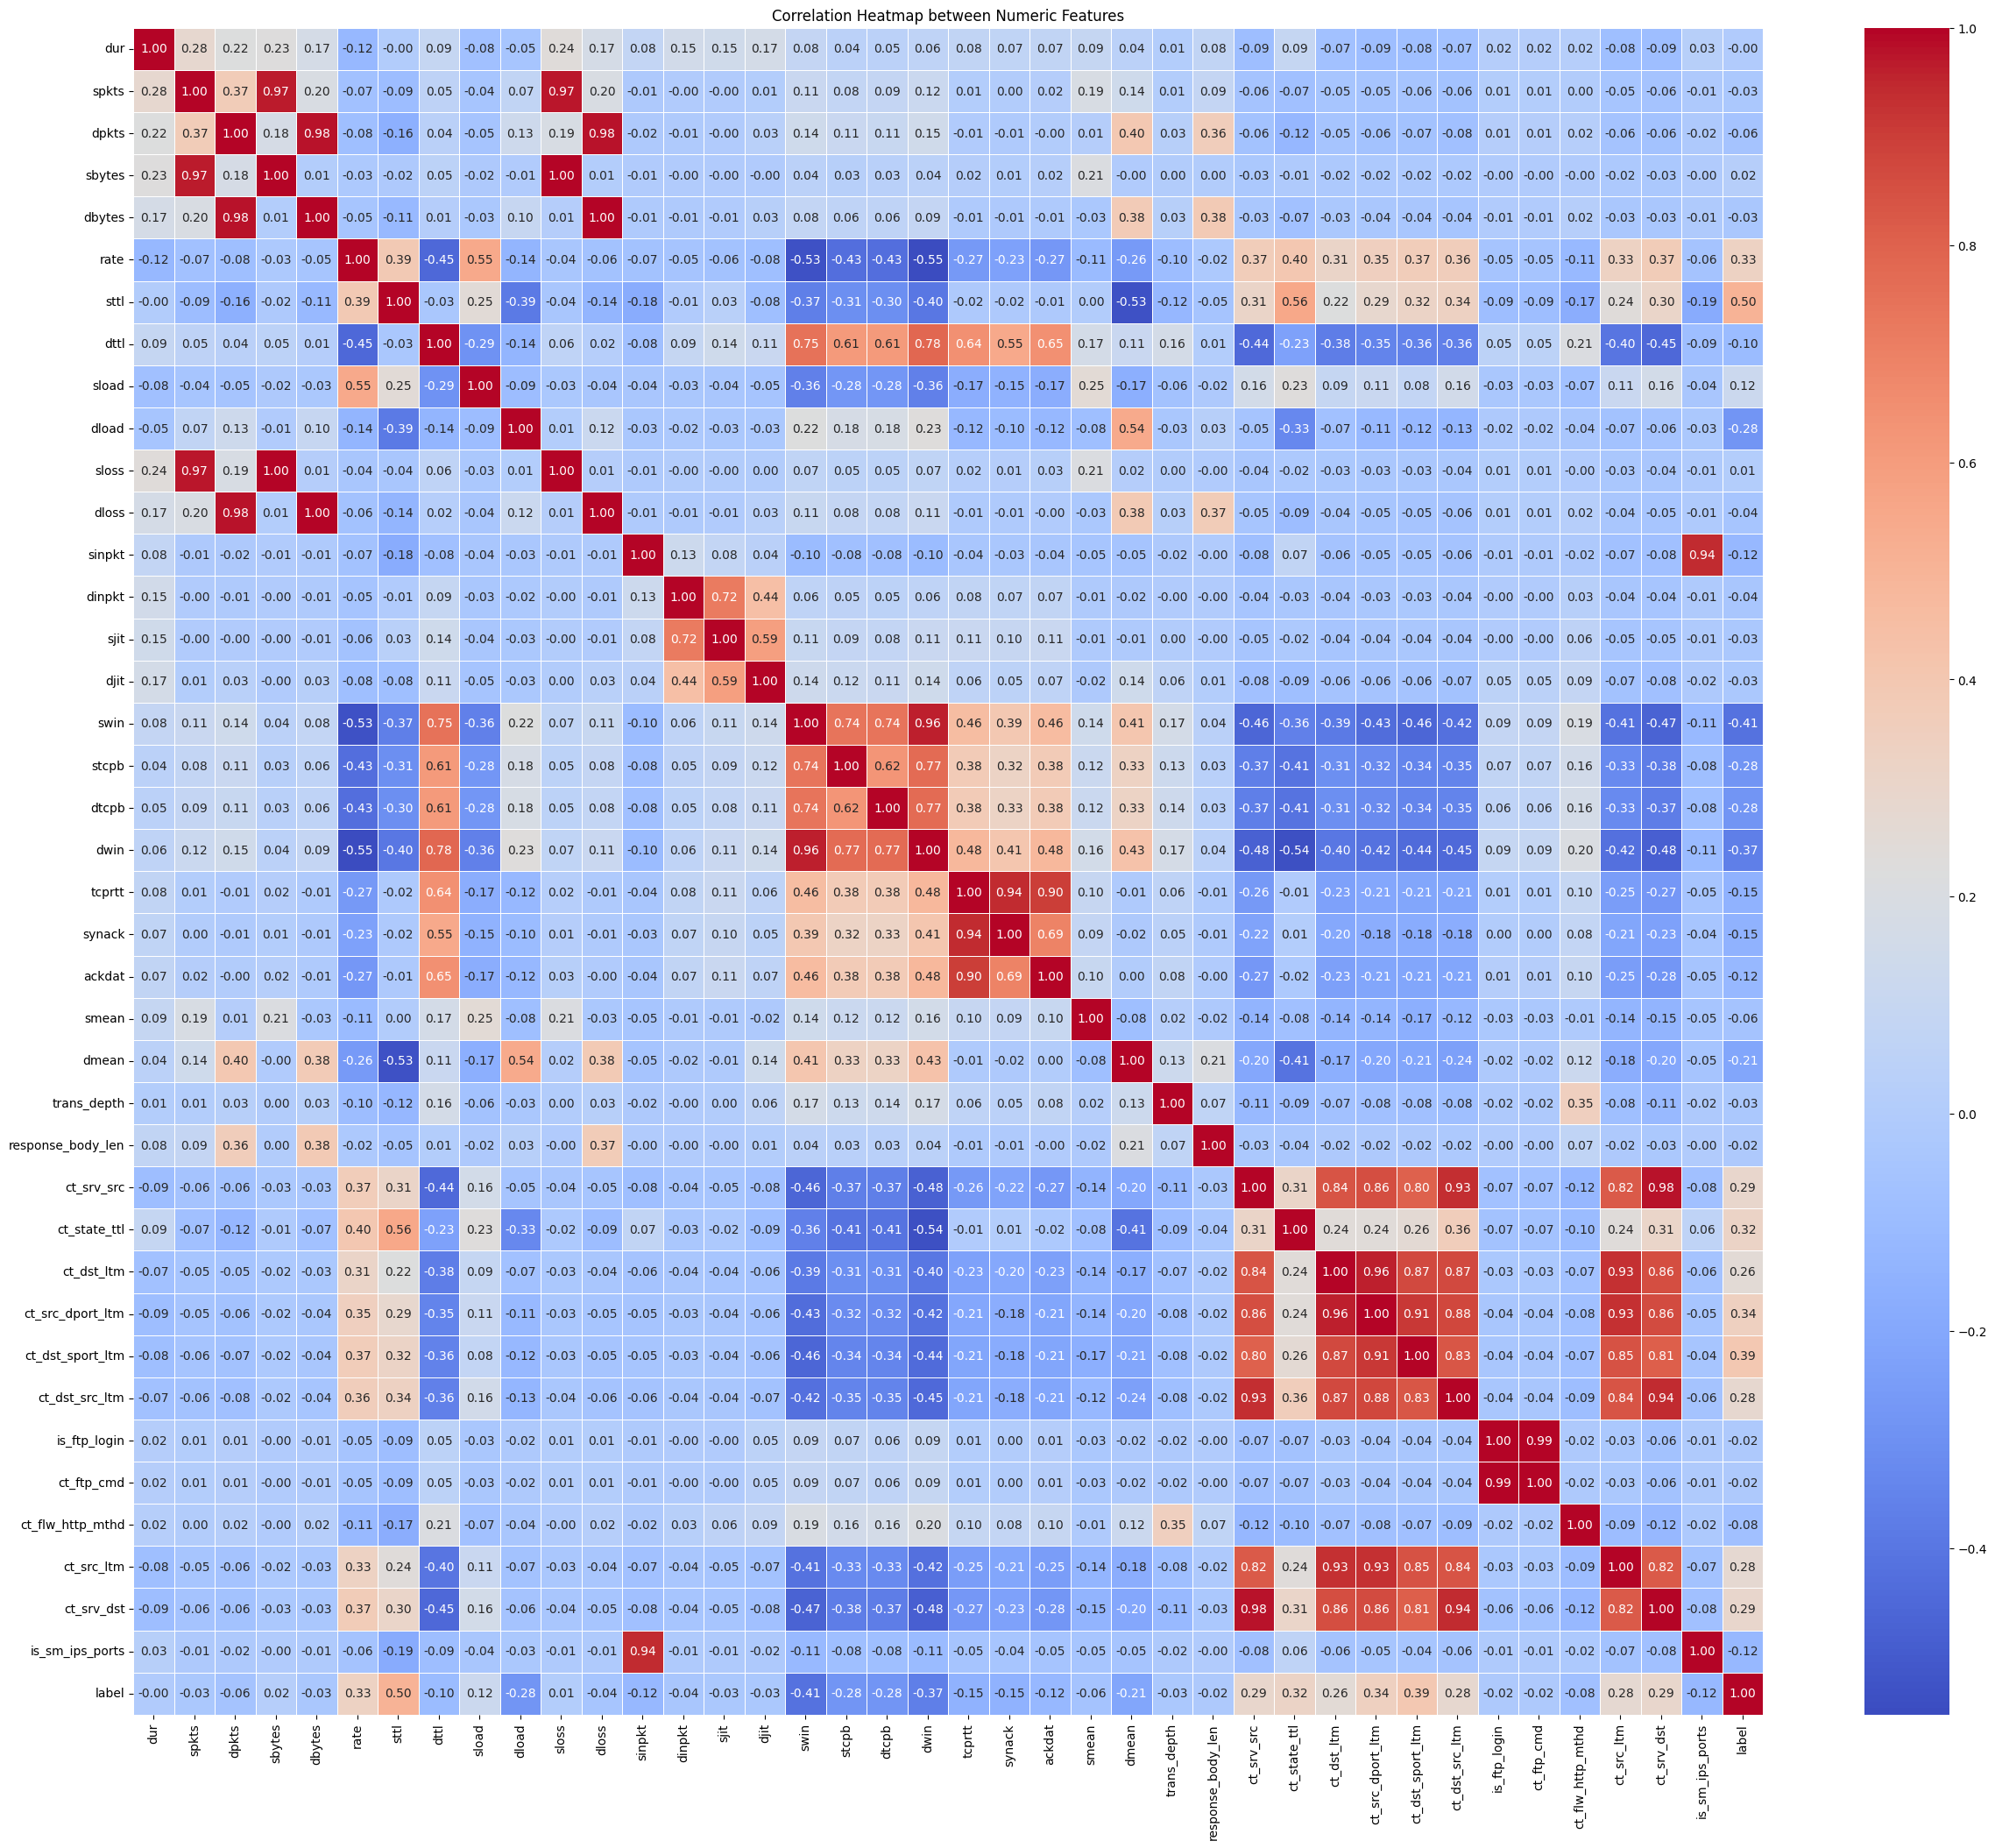

In [26]:
numerical_columns = [col for col in df.columns if df[col].dtypes != "object"]
# Calculate the correlation matrix for numerical columns
corr = df[numerical_columns].corr()

plt.figure(figsize=(30, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

In [27]:
corr_matrix = df[numerical_columns].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.80]
high_corr_pairs

,Feature 1,Feature 2,Correlation
40,spkts,sbytes,0.965750
47,spkts,sloss,0.973644
78,dpkts,dbytes,0.976419
85,dpkts,dloss,0.981506
120,sbytes,sloss,0.995027
156,dbytes,dloss,0.997109
427,sinpkt,is_sm_ips_ports,0.944506
506,swin,dwin,0.960125
590,tcprtt,synack,0.939473
591,tcprtt,ackdat,0.897688


In [28]:
features_to_drop = ['ct_state_ttl', 'ct_dst_sport_ltm', 'ct_src_ltm']
df = df.drop(features_to_drop, axis=1)

# 4. Preprocessing for the Model

#### Encoding

In [29]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [30]:
categorical_columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [31]:
df = pd.get_dummies(df, columns=['proto', 'service'], drop_first=True)

In [32]:
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])
df['attack_cat'] = label_encoder.fit_transform(df['attack_cat'])

#### Feature Engineering

In [33]:
# Interaction between source and destination load
df['load_interaction'] = df['sload'] * df['dload']

In [34]:
# Total transaction bytes between source and destination
df['total_bytes'] = df['sbytes'] + df['dbytes']

In [35]:
# Packet flow ratio between source and destination
df['pkt_flow_ratio'] = df['spkts'] / (df['dpkts'] + 1)

In [36]:
# Bytes difference and ratio
df['bytes_diff'] = df['sbytes'] - df['dbytes']
df['bytes_ratio'] = df['sbytes'] / (df['dbytes'] + 1)

In [37]:
# TTL difference
df['ttl_diff'] = df['sttl'] - df['dttl']

In [38]:
# Jitter difference and ratio
df['jitter_diff'] = df['sjit'] - df['djit']
df['jitter_ratio'] = df['sjit'] / (df['djit'] + 1)

In [39]:
# Difference between synack and ackdat times
df['tcp_time_diff'] = df['synack'] - df['ackdat']

In [40]:
df.sample(10)

,dur,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_ssl,load_interaction,total_bytes,pkt_flow_ratio,bytes_diff,bytes_ratio,ttl_diff,jitter_diff,jitter_ratio,tcp_time_diff
12236,0.000007,4,2,0,114,0,142857.140900,254,0,6.514286e+07,...,False,0.000000e+00,114,2.000000,114,114.000000,254,0.000000,0.000000,0.000000
61844,1.286349,3,10,8,956,354,13.215697,254,252,5.354689e+03,...,False,1.032350e+07,1310,1.111111,602,2.692958,2,7570.994238,24.248284,0.010844
46054,0.217112,3,10,6,1612,268,69.088764,254,252,5.346549e+04,...,False,4.412937e+08,1880,1.428571,1344,5.992565,2,1111.648637,19.712652,0.004111
6093,0.165625,3,10,6,852,268,90.566034,254,252,3.704755e+04,...,False,4.008405e+08,1120,1.428571,584,3.167286,2,953.886541,21.294356,-0.000042
51162,0.428404,3,10,6,534,268,35.013678,254,252,8.982176e+03,...,False,3.757215e+07,802,1.428571,266,1.985130,2,2178.728728,22.978830,-0.000221
31508,0.003384,2,2,2,130,162,886.524843,31,29,1.536643e+05,...,False,2.942508e+10,292,0.666667,-32,0.797546,2,0.000000,0.000000,0.000000
62662,0.000009,4,2,0,114,0,111111.107200,254,0,5.066666e+07,...,False,0.000000e+00,114,2.000000,114,114.000000,254,0.000000,0.000000,0.000000
31474,0.004126,3,8,10,1040,824,4120.213064,31,29,1.764421e+06,...,False,2.538439e+12,1864,0.727273,216,1.260606,2,34.109265,20.065809,0.000390
71935,0.000009,4,2,0,1064,0,111111.107200,254,0,4.728889e+08,...,False,0.000000e+00,1064,2.000000,1064,1064.000000,254,0.000000,0.000000,0.000000
50021,0.000003,4,2,0,200,0,333333.321500,254,0,2.666667e+08,...,False,0.000000e+00,200,2.000000,200,200.000000,254,0.000000,0.000000,0.000000


In [41]:
data1 =df.copy()
data2 =df.copy()

# 5. Modelling

## Data 1 -> Without Over Sampling

In [42]:
from sklearn.model_selection import train_test_split
X = data1.drop('label', axis=1)
y = data1['label']

In [43]:
scalers = [
    MinMaxScaler(),
    RobustScaler()
]

In [44]:
!pip install xgboost
import xgboost as xgb # Import the xgboost library

In [45]:
models = [
    ('KNN', KNeighborsClassifier(), {}),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    })
]

In [46]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


In [47]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [48]:
results_df = None

Running model: KNN with MinMaxScaler
Values for class label
1    31732
0    25900
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.9976
Test Accuracy: 0.9964


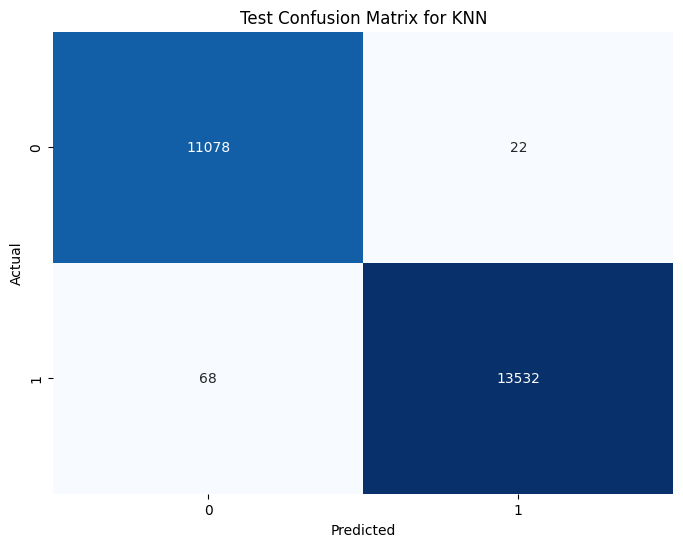



Classification Report for KNN on Test Set
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11100
           1       1.00      0.99      1.00     13600

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700



Running model: Random Forest with MinMaxScaler
Values for class label
1    31732
0    25900
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.9989


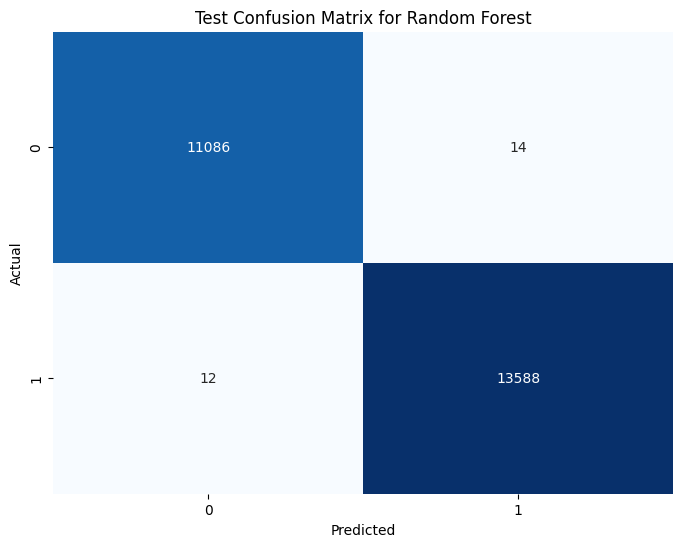



Classification Report for Random Forest on Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11100
           1       1.00      1.00      1.00     13600

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700



Running model: XGBoost with MinMaxScaler
Values for class label
1    31732
0    25900
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Training Accuracy: 1.0000
Test Accuracy: 1.0000


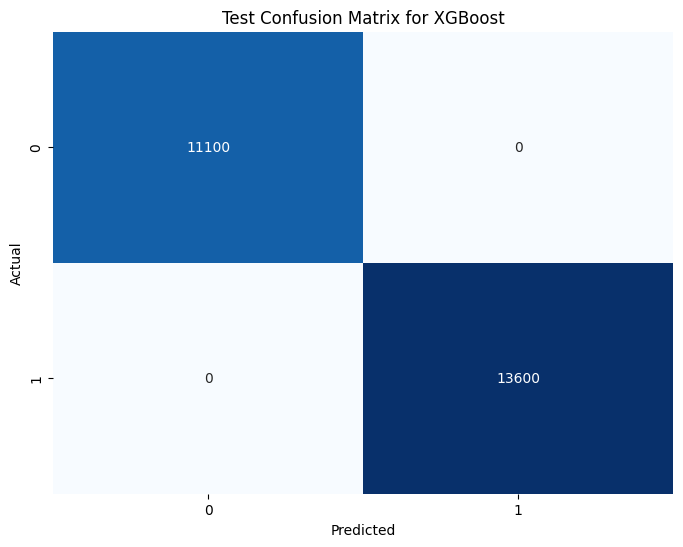



Classification Report for XGBoost on Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11100
           1       1.00      1.00      1.00     13600

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700



Running model: KNN with RobustScaler
Values for class label
1    31732
0    25900
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.9563
Test Accuracy: 0.9330


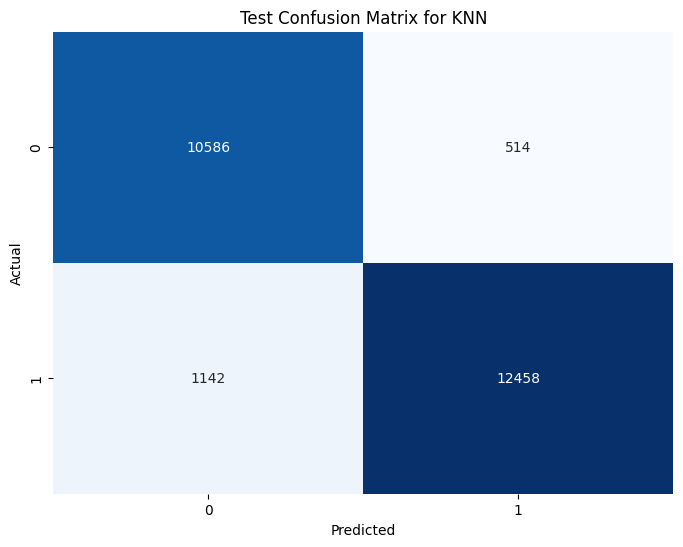



Classification Report for KNN on Test Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     11100
           1       0.96      0.92      0.94     13600

    accuracy                           0.93     24700
   macro avg       0.93      0.93      0.93     24700
weighted avg       0.93      0.93      0.93     24700



Running model: Random Forest with RobustScaler


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import joblib

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    # ========= scaling ==========
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyperparameter Tuning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train, y_train, X_test, y_test)

        # Save the best model
        model_filename = f"{model_name}_{scaler.__class__.__name__}.joblib"
        joblib.dump(best_model, model_filename)
        print(f"Model saved as {model_filename}")

        # Predict using best model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

        # ======== Print Classification Report ==============
        print(f"Classification Report for {model_name} on Test Set")
        print(classification_report(y_test, y_test_pred))

        print("\n=======================================================\n")

In [ ]:
results_df

## Data 2 -> Smote

In [ ]:
from sklearn.model_selection import train_test_split
X = data2.drop('label', axis=1)
y = data2['label']

In [ ]:
scalers = [
    MinMaxScaler(),
    StandardScaler()
]

In [ ]:
!pip install xgboost
import xgboost as xgb # Import the xgboost library

In [ ]:
models = [
    ('KNN', KNeighborsClassifier(), {}),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    })
]

In [ ]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


In [ ]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [ ]:
results_df = None

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE 

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    # ========= scaling ==========
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Fit and resample your training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyper Paramater Tunning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train_resampled, y_train_resampled, X_test, y_test)
        # Predict using best model
        y_train_pred = best_model.predict(X_train_resampled)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train_resampled, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

In [ ]:
results_df

# Thank You